In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
import webdataset as wds

In [2]:
# Path to webdataset shards
WDS_DIR = "../data/webdataset"

# List shards in each split
for split in ['train', 'val', 'test']:
    split_dir = os.path.join(WDS_DIR, split)
    n_shards = len(glob(os.path.join(split_dir, "*.tar")))
    print(f"{split}: {n_shards} shards")

train: 1 shards
val: 1 shards
test: 1 shards


In [3]:
def plot_5ch_stack(stack, meta=None):
    """Plot a 5-channel image stack with metadata."""
    # 5 subplots (one per channel), side by side
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

    # Create title with metadata
    if meta:
        title = f"BROAD_ID: {meta['broad_id']}"
        if meta['compound_name']:
            title += f"\nCompound: {meta['compound_name']}"
        title += f"\nPlate: {meta['plate_id']}, Well: {meta['well']}, Site: {meta['site']}"
    else:
        title = "5-channel stack"

    fig.suptitle(title, fontsize=12, y=1.1)

    # Channels in order
    titles = ["DNA", "ER", "RNA", "AGP", "Mito"]

    for ax, img, title in zip(axes, stack, titles):
        # Show min/max in title
        ax.imshow(img, cmap="gray")
        ax.set_title(f"{title}\n(min={img.min():.3f}, max={img.max():.3f})")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

/Users/lapuerta/miniconda3/envs/cell-diffusion-env/lib/python3.10/site-packages/webdataset/compat.py:136: UserWarning: WebDataset(shardshuffle=...) is None; set explicitly to False or a number
  warnings.warn("WebDataset(shardshuffle=...) is None; set explicitly to False or a number")


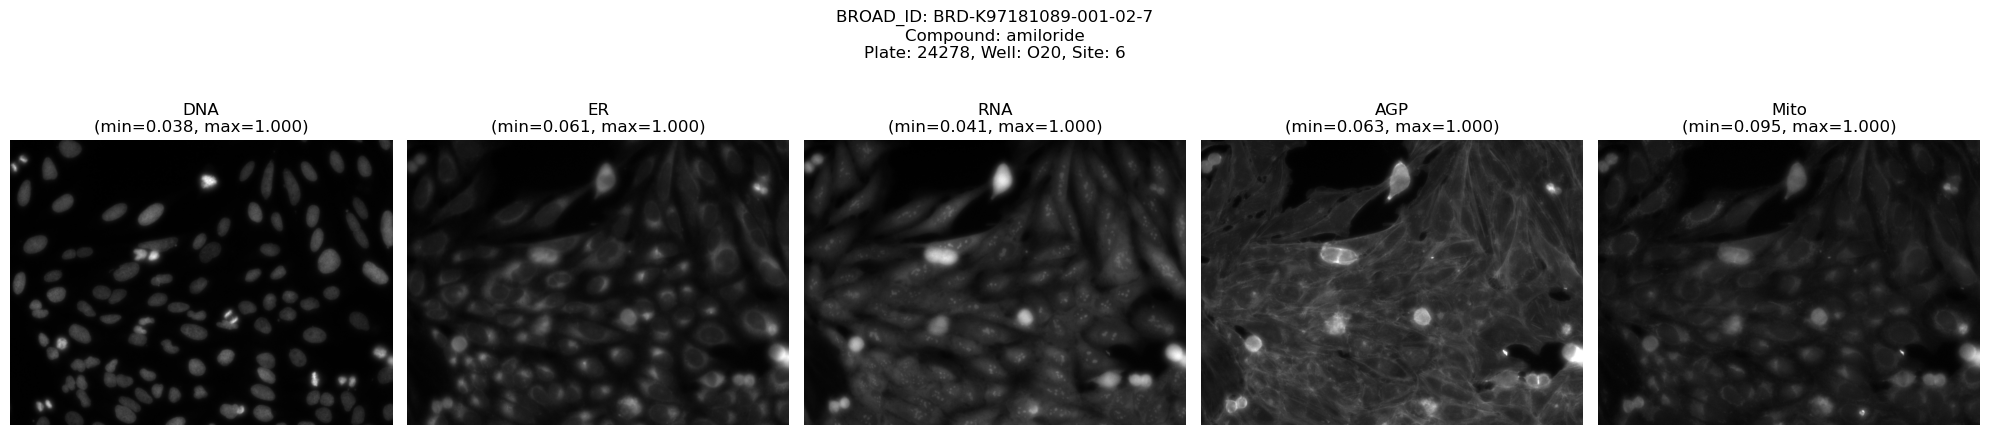


Metadata:
broad_id: BRD-K97181089-001-02-7
compound_name: amiloride
compound_type: INN
smiles: NC(=N)NC(=O)c1nc(Cl)c(N)nc1N
plate_id: 24278
well: O20
site: 6

--------------------------------------------------



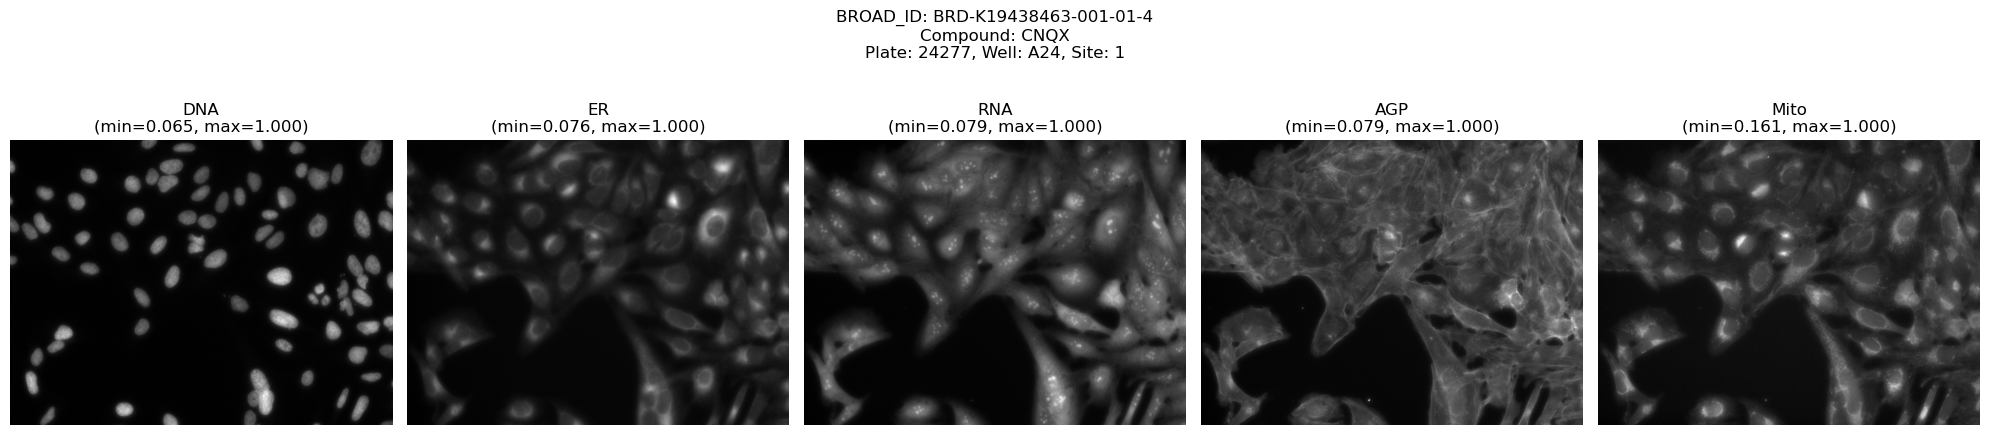


Metadata:
broad_id: BRD-K19438463-001-01-4
compound_name: CNQX
compound_type: primary-common
smiles: [O-][N+](=O)c1cc2[nH]c(=O)c(=O)[nH]c2cc1C#N
plate_id: 24277
well: A24
site: 1

--------------------------------------------------



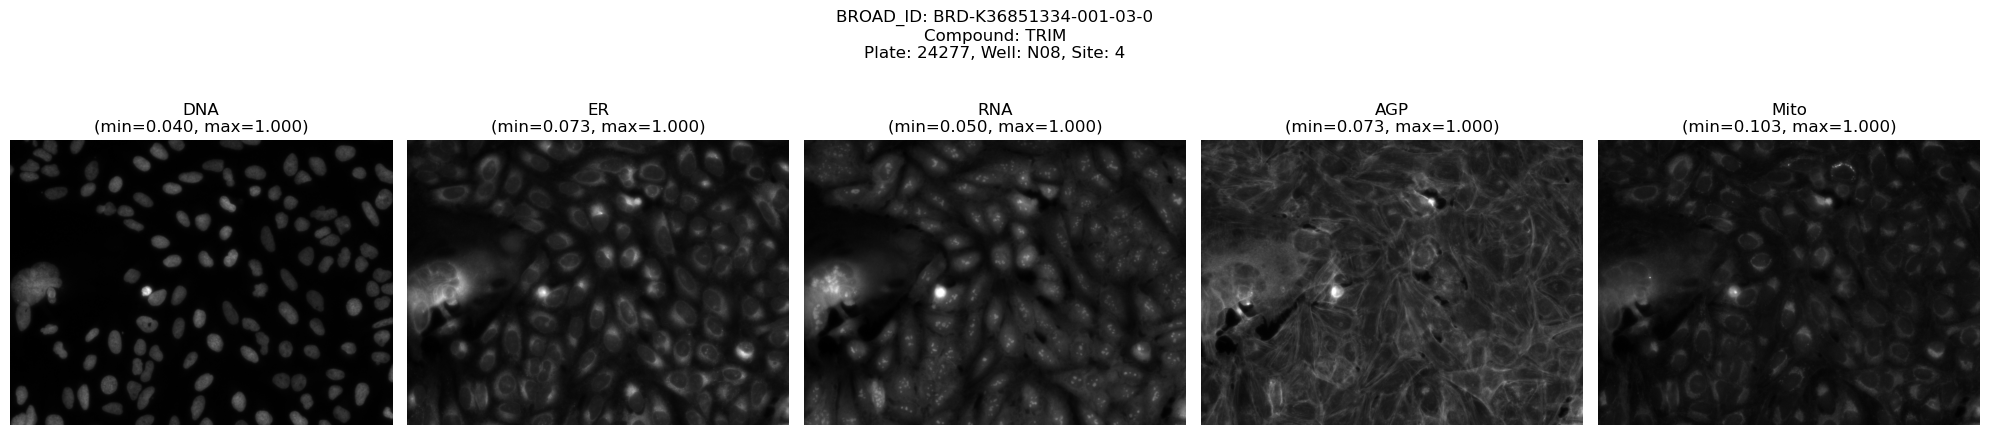


Metadata:
broad_id: BRD-K36851334-001-03-0
compound_name: TRIM
compound_type: primary-common
smiles: FC(F)(F)c1ccccc1-n1ccnc1
plate_id: 24277
well: N08
site: 4

--------------------------------------------------



In [4]:
val_pattern = f"{WDS_DIR}/val/shard_{{000000..999999}}.tar"
dataset = wds.WebDataset(val_pattern).decode()

for i, sample in enumerate(dataset):
    if i >= 3:
        break

    images = sample['images.npy']
    meta = sample['meta.json']

    plot_5ch_stack(images, meta)
    print("\nMetadata:")
    for k, v in meta.items():
        if v is not None:  # Only show non-None values
            print(f"{k}: {v}")
    print("\n" + "-"*50 + "\n")